# Assignment II - Logistic Regression
### Year 2022-2023- Semester II
### CCE2502
####  developed by - Adrian Muscat, 2023
---
# Write Your NAME, ID and CLASS in the space below

####  Jasmine Micallef
####  395301L
####  CCE2502




---

In this assignment you will develop a multi-class model on the basis of the binary logistic regressor classifier. 
A number of functions are given, including the gradient descent optimizer. You will be required to develop a few more functions to build and evaluate the multi-class model.

NOTES: 
1. The maximum score is 100.

2. The assignment is worth 30% of the final unit mark.

2. Submit the jupyter notebook complete with answers and excuted code on VLE. 

## NOTE: 
This assignment is to be attempted individually. It is essential that the work you submit and present consists only of your own work; use of copied material will be treated as plagiarism. Discussion is only permitted on general issues, and it is absolutely forbidden to discuss specific details with anyone and/or share results.

Please sign and attached the plagiarism form at:

https://www.um.edu.mt/ict/students/formsguidelines/

Warning: Late submissions will be graded 0F

# IMPORTANT NOTE
# You are only allowed to use the numpy, matplotlib, csv and pickle libraries to load data, perform calculations and visualise data.
# The use of other data science and machine learning libraries or frameworks (such as pandas, sk-learn, keras, etc) is strictly forbidden. Marks will be deducted for using such libraries.

# Part I
# Load libraries
# Do not change the code in this part

In [1]:
# import  libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import pickle
%matplotlib inline

In [2]:
def lr_loss_function(y_target,y_predicted):
    #
    #y_target: actual gold labels (vector of size(m,))
    #y_predicted : predicted probabilities for positive class (vector of size (m,))
    #
    m=y_target.shape[0]
    L = -(y_target*np.log(y_predicted) + (1-y_target)*np.log(1-y_predicted)).sum()/m
    return L


def predict_y_prob(W,D):
    # W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    # where N is number of features, excluding bias
    # D is the feature matrix [m,N] where m is the number of examples
    # return a vector of size (m,1)
    #
    m = D.shape[0]
    bias = np.ones([m,1], dtype=float)
    X = np.concatenate((bias,D),axis=1)
    z = np.matmul(W.T,X.T)
    y = 1/(1+np.exp(-z))
    #
    return y.T

def get_accuracy(W,X,y):
    # W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    # where N is number of features, excluding bias
    # X is the feature matrix [m,N] where m is the number of examples
    # y is the gold label vector of size (m,)
    # Computes the accuracy
    # in predicting the positive class and returns a scalar
    #
    Y_pred = (predict_y_prob(W,X)>=0.5).astype(int)
    #
    return (Y_pred.ravel()==y).astype(int).sum()/y.shape[0]


In [3]:
# Gradient Descent algoruthm that learn the model parameters
# The update equations require the partial derivatives of the loss function
# with respect to the weights or parameter of the model
#
def lr_train_model(X_data, 
                   y_data, 
                   reshuffle = 'yes',
                   split_frac=0.8, 
                   init_weights=0.00001, 
                   no_iterations=2000,
                   alpha = 0.001,
                   phi = 0.001):
    """
    X_data : data feature matrix (including bias x_0 = 1.0)
    y_data : data output values
    split_frac : data split fraction, we require the split to compute validation mse
        if split_frac = -1 (or negative), then dataset is not split and train and val portions are the same
    init_weights : initial weights (all same value)
        if init_weights = -1 (or negative), then random weights are chosen
    alpha : learning rate
    # phi : regularisation constant
    """
    #
    idx = np.arange(0, y_data.shape[0])
    if reshuffle == 'yes':
        np.random.shuffle(idx)
    X_data = np.copy(X_data[idx])
    y_data = np.copy(y_data[idx])
    #
    split = int(y_data.shape[0]*split_frac)
    if split_frac < 0.0:
        split = y_data.shape[0]
        y_train = y_data[0:split]
        y_val = y_data[0:split]
        X_train = X_data[0:split]
        X_val = X_data[0:split]
    else:
        y_train = y_data[0:split]
        y_val = y_data[split:]
        X_train = X_data[0:split]
        X_val = X_data[split:]
    #
    N = X_data.shape[1] # number of features
    if init_weights < 0.0:
        W = 0.5*(np.random.rand((N+1))-0.5).reshape(N,1)
    else:
        W = np.full((N+1,1), init_weights) # initialise weight vectors to teh same value
    m=y_train.shape[0]
    history_loss=[]
    history_val_loss=[]
    #
    for itr in range(no_iterations):
        y_pred_pr = predict_y_prob(W,X_train).ravel()
        loss = lr_loss_function(y_train,y_pred_pr)
        history_loss.append(loss)
        history_val_loss.append(lr_loss_function(y_val,predict_y_prob(W,X_val).ravel()))
        #
        W[0] = W[0] + alpha*((y_train-y_pred_pr)).sum()/2/m
        #
        for j in range(1,N+1):
            W[j] = W[j] + alpha*((y_train-y_pred_pr)*X_train[:,j-1]-phi*W[j]).sum()/2/m
    #
    return {'weights':W, 'history':{'train_loss':history_loss,
                                    'val_loss':history_val_loss},
            'train_acc':get_accuracy(W,X_train,y_train),
            'val_acc':get_accuracy(W,X_val,y_val)}

def display_results(model):
    #
    history_train_loss = model['history']['train_loss']
    history_val_loss = model['history']['val_loss']
    t=range(len(history_train_loss))
    p1, p2 = plt.plot(t,history_train_loss,'b',t,history_val_loss,'r')
    plt.legend([p1,p2], ['Train loss','Val loss'])
    #
    print('train acc : ', model['train_acc'])
    print('val acc   : ', model['val_acc'])
    #
    print('Weights : ', model['weights'].ravel())
    return 0

# Part II Graded Questions below
# Introduction to dataset

<p>In this part you will be building a multi-class classification model.</p>
<p>You will be using a very small subset of the VRD (Visual Relation Detection) dataset, which is a real-world dataset. 
https://cs.stanford.edu/people/ranjaykrishna/vrd/ 
    
<p>The VRD task is defined as:
Given two objects, what is the relation between them?
Below is an example. The image depicts two bicycles and a person. The person is enclosed in a blue bounding box and the bicycle on the right in a green bounding box. The task of the model is to select an appropriate spatial relation between the two objects, for example</p>
<p>Person TO THE LEFT OF bicycle</p>
<p>Bicycle TO THE RIGHT OF person</p>
<img src="2008_008320_BB.jpeg" alt="drawing" width="300"/>
<p>The VRD task is not simple and the relation selected often depends on external influences, such as the frame of reference. For example humans tend to take the point of view of the depicted person rather than the camera view. For example "Bicycle TO THE LEFT OF person" is also correct. Unless corrected such labels manifest themselves as noise in the dataset and are a source of confusion during learning. Further more note that the relation changes if the order of the two objects changes. In general one object (the trajector) is located with respect to the other object (the landmark)</p>
<p>Data pre-processing is a very important task in any machine learning project and often requires significant knowledge of the domain. In the case of this assignment, the dataset has been prepared for you, complete with feature extraction and class labels since the study unit deals solely with the develpment of the model. This means that for this assignment you do not need domain knowledge and in any case the domain is from every day life and typically common sense.</p>
<p> Specifically the dataset is characterised by six real-valued features and four categorical output classes.</p>
<p> Your task is to develop a multi-class model based on the logistic-regression model developed in class. So make sure you have understood this model (lr_train_model in cell above).</p> 
<p>Execute below cells and then answer the questions that follow.</p>

In [4]:
# First, we load the dataset
data = pickle.load(open("SRD_Dataset.pkl", "rb"))
#

In [5]:
# We now explore the dataset
#
# The examples are organised as a list
print("Number of examples = ",len(data),"\n")
#
# Let us explore one example
example = data[0]
# each example is organised in a dictionary structure; check using type(example))
print("Keys in example dictionary :",data[0].keys(),"\n")
# below is an explanation for each key
# Each example refers to an image and two objects in the image
# 'filename' : filename of image
# 'imSizeX', 'imSizeY' : size of image in pixels
# 'landmark', 'trajector' : the two objects (object, subject)
# 'spatial_label' : the output class
# 'geo_feat' : the input features for the spatial configuration
#
# NOTE: In this assignment you only need to use 'spatial_label' and 'geo_feat'
#
# Let us explore 'spatial_label':
print('Some example output labels:')
for item in data[8:12]:
    print("   ",item['spatial_label'])
print()
# There are actually four unique labels in the dataset
#
# Let us explore the features
print('Feature Headings:')
for item in list(data[0]['geo_feat'].keys()):
    print("   ",item)
# The first four and the last two are somewhat correlated
# So it may be the case can we can use either or both 
# Resulting in models of various complexity
# And finally, let us see some examples of features
print("\nThe features for one example:")
feat_keys = list(data[0]['geo_feat'].keys())
for item in feat_keys:
    print("   ",data[0]['geo_feat'][item])
    

Number of examples =  1199 

Keys in example dictionary : dict_keys(['filename', 'imSizeX', 'imSizeY', 'landmark', 'trajector', 'spatial_label', 'geo_feat']) 

Some example output labels:
    above
    on the right of
    on the left of
    under

Feature Headings:
    InvFeatXminXmin
    InvFeatXmaxXmin
    InvFeatYminYmin
    InvFeatYmaxYmin
    unitVecTrajLand_Norm_wt_UnionBB_x
    unitVecTrajLand_Norm_wt_UnionBB_y

The features for one example:
    0.839041095890411
    1.9623287671232876
    0.11178247734138973
    0.6797583081570997
    0.9751722346356505
    0.22144776538884195


In [6]:
# DO NOT MODIFY THIS CELL
# copy features and classes into numpy arrays
geo_feat_keys = list(data[0]['geo_feat'].keys())
m = len(data)  # number of examples
N = len(geo_feat_keys) # number of features
X_data = np.zeros((m,N))
y_data = np.zeros(m)
#
# code a label encoder
label_encode = {'above':0,
                'under':1,
                'on the left of':2,
                'on the right of':3}
#
label_decode = {0:'above',
                1: 'under',
                2: 'on the left of',
                3: 'on the right of'}

#
for j, item in enumerate(data[0:]):
    # store geo_feat in array
    dummy = np.zeros(N)    
    for i, g in enumerate(geo_feat_keys):
        dummy[i] = item['geo_feat'][g]
    X_data[j,:] = np.copy(dummy)
    y_data[j] = label_encode[item['spatial_label']]
                   
    
print("Shape of X :",X_data.shape)
print("Shape of y :",y_data.shape)

Shape of X : (1199, 6)
Shape of y : (1199,)


In [7]:
# DO NOT MODIFY THIS CELL
#
# Split the dataset into train and test

S=(int)(len(data)*.8)
print(S)
X_train = X_data[0:S,0:6]
y_train = y_data[0:S]
X_test = X_data[S:,0:6]
y_test = y_data[S:]
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)
print(X_train.mean(axis=0))
print(X_train.var(axis=0))
#
# normalisation
X_mean = X_train.mean(axis=0)
X_var = X_train.var(axis=0)
X_train = (X_train - X_mean)/np.sqrt(X_var)
X_test = (X_test - X_mean)/np.sqrt(X_var)
print(X_train.var(axis=0))

959
X_train :  (959, 6)
y_train :  (959,)
X_test :  (240, 6)
y_test :  (240,)
[-0.64146693  1.65022919 -0.45602928  1.06652919 -0.01177097  0.02942184]
[12.06538029 15.63844514  4.15806149  3.05253844  0.53498208  0.46401372]
[1. 1. 1. 1. 1. 1.]


In [8]:
# Sanity Check
print(X_train.sum())
assert X_train.sum()==-5.968558980384842e-13, "Error in X_train"
#
print((X_train**2.0).sum())
assert (X_train**2.0).sum()==5753.999999999998, "Error in X_train"
#
print(y_train.sum())
assert y_train.sum()==1439.0, "Error in y_train"
#
print(X_test.sum())
assert X_test.sum()==9.515302262342551, "Error in X_test"
#
print((X_test**2.0).sum())
assert (X_test**2.0).sum()==1592.3413587473128, "Error in X_test"
#
print(y_test.sum())
assert y_test.sum()==361.0, "Error in y_test"


-5.968558980384842e-13
5753.999999999998
1439.0
9.515302262342551
1592.3413587473128
361.0


# GRADED QUESTIONS BELOW
# IMPORTANT NOTE: Provide short explanations and any comments that add value to your answers

# QUESTION 1:  [10 marks]

## Develop a function that takes as input the output variable vector (usually labelled as "y"), computes the output class distribution and plots the distribution on a bar chart 

## Use the function to plot the output class distribution for the train set and test set separately
### Note: you might find the function useful further on


In [9]:
def class_distribution(y):
    
    """
    Computes the output class distribution and plots the distribution on a bar chart.
    Args:
        y: The output variable vector.
    Returns:
        The count of samples in each class.
    """
        
    # Get unique class labels and initialize counts
    labels = np.unique(y)
    counts = np.zeros(len(labels))
    
    # Convert label codes to string labels for visualization
    labelStr = [label_decode[x] for x in range(len(labels))]
    
    # Count the number of samples for each class
    for l in range(len(labels)):
        counts[l] = y.tolist().count(labels[l])
        print(labelStr[l],"| count:",counts[l])

    # Plot a bar graph of the class distribution
    plt.bar(labelStr, counts)
    plt.show()
    
    # Return the counts for each class
    return counts

Train set class distribution:

above | count: 245.0
under | count: 232.0
on the left of | count: 239.0
on the right of | count: 243.0


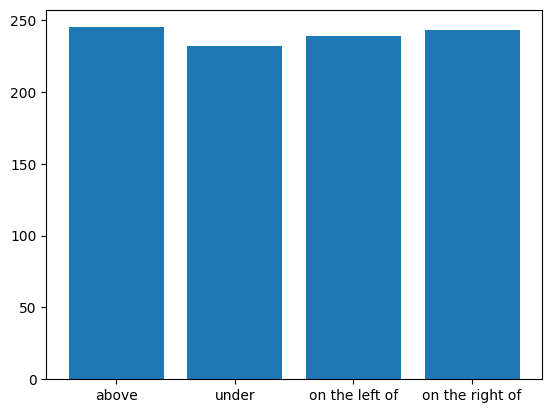

In [10]:
print("Train set class distribution:\n")
train_class_distribution = class_distribution(y_train)

Test set class distribution:

above | count: 54.0
under | count: 68.0
on the left of | count: 61.0
on the right of | count: 57.0


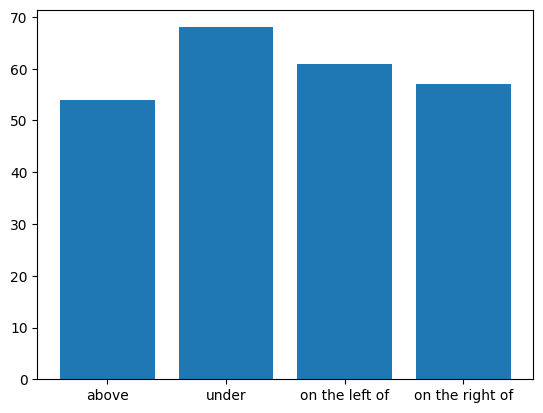

In [11]:
print("Test set class distribution:\n")
test_class_distribution = class_distribution(y_test)

# QUESTION 2:  [15 marks]

## You will be developing a multi-class method using the one-vs-rest method. The number of unique classes is four and therefore you need to develop four binary classification models. This necessitates that you extract four one-vs-rest (OvR) training sets out of the full training set.  
## Extract these four OvR datasets. 
## Label the X_train and y_train arrays as X_train_[class] and y_train_[class]
## e.g X_train_above, y_train_above for the class "above"
### Remember to copy the array where necessary and include any necessary sanity checks


In [12]:
def ovr_data(X, y, class_label):
    '''
    Returns OvR data for a given class label
    Inputs:
        X: A 2D array of the input data.
        y: A 1D array of the target labels.
        class_label: int
            The class label for which to create OvR data.
    Returns:
        X_ovr: array-like, shape = [n_samples, n_features]
            OvR data for the given class label.
        y_ovr: array-like, shape = [n_samples]
            OvR labels for the given class label.
    '''
    # create a copy of the input data
    X_ovr = np.copy(X)

    # create binary labels for the given class label
    y_ovr = np.zeros_like(y)
    y_ovr[y == class_label] = 1

    return X_ovr, y_ovr


In [13]:
#Extracting the OvR datasets

X_train_above, y_train_above = ovr_data(X_train, y_train, 0)
X_train_under, y_train_under = ovr_data(X_train, y_train, 1)
X_train_on_the_left_of, y_train_on_the_left_of = ovr_data(X_train, y_train, 2)
X_train_on_the_right_of, y_train_on_the_right_of = ovr_data(X_train, y_train, 3)


In [14]:
# Sanity Checks
print(X_train_above.sum())
assert X_train_above.sum()==-5.968558980384842e-13, "Error in X_train_above"
#
print(y_train_above.sum())
assert y_train_above.sum()==245.0, "Error in y_train_above"
#
print(X_train_under.sum())
assert X_train_under.sum()==-5.968558980384842e-13, "Error in X_train_under"
#
print(y_train_under.sum())
assert y_train_under.sum()==232.0, "Error in y_train_under"
#
print(X_train_on_the_left_of.sum())
assert X_train_on_the_left_of.sum()==-5.968558980384842e-13, "Error in X_train_on_the_left_of"
#
print(y_train_on_the_left_of.sum())
assert y_train_on_the_left_of.sum()==239.0, "Error in y_train_on_the_left_of"
#
print(X_train_on_the_right_of.sum())
assert X_train_on_the_right_of.sum()==-5.968558980384842e-13, "Error in X_train_on_the_right_of"
#
print(y_train_on_the_right_of.sum())
assert y_train_on_the_right_of.sum()==243.0, "Error in y_train_on_the_right_of"


-5.968558980384842e-13
245.0
-5.968558980384842e-13
232.0
-5.968558980384842e-13
239.0
-5.968558980384842e-13
243.0


# QUESTION 3:  [40 marks]

## Use the gradient descent algorithm given in this notebook (lr_train_model) to train the four models, one at a time.  In this case you've got six features and so the weight vector per model is of length 7. Use a split ratio of 0.8 (train/val) during training and compute the final accuracy on the test set, post training.
## Label the four models as lr_model_[class], for example lr_model_above for the class "above". Thus the weights and other useful outputs are saved in the respective dictionary ( lr_model_[class] ).


In [15]:
#numpy array to store the final accuracies of each model
accuracy = np.zeros(4)


train acc :  0.8904823989569752
val acc   :  0.90625
Weights :  [-0.21869057 -0.03973349  0.03184939 -0.16552899 -0.14251856  0.00674127
  0.23689289]
Accuracy on test set: 0.9208333333333333


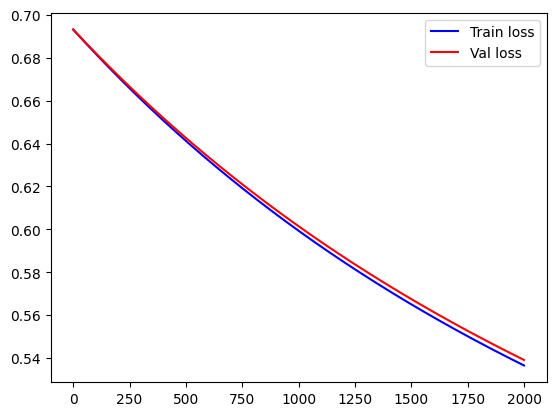

In [16]:
#train ovr model using ovr training sets
lr_model_above = lr_train_model(X_train_above, y_train_above)
display_results(lr_model_above)

#convert test sets to ovr format to match the predictions of the model
X_test_above, y_test_above = ovr_data(X_test, y_test, 0)
accuracy[0] = (get_accuracy(lr_model_above['weights'],X_test_above, y_test_above))

print("Accuracy on test set:", accuracy[0])

train acc :  0.8930899608865711
val acc   :  0.8854166666666666
Weights :  [-0.23113246 -0.00895794  0.01922038  0.08123689  0.13359594 -0.00597863
 -0.2266613 ]
Accuracy on test set: 0.8666666666666667


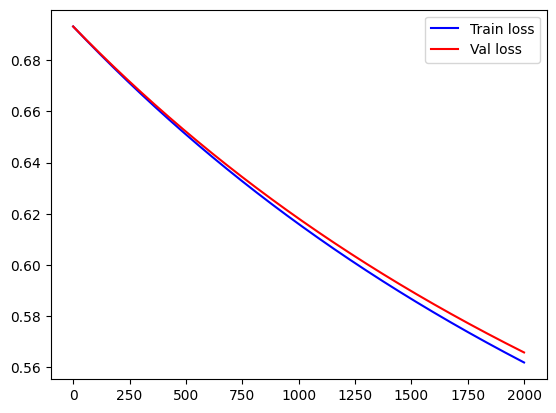

In [28]:
#train ovr model using ovr training sets
lr_model_under = lr_train_model(X_train_under, y_train_under)
display_results(lr_model_under)

#convert test sets to ovr format to match the predictions of the model
X_test_under, y_test_under = ovr_data(X_test, y_test, 1)
accuracy[1] = (get_accuracy(lr_model_under['weights'],X_test_under, y_test_under))

print("Accuracy on test set:", accuracy[1])

train acc :  0.8904823989569752
val acc   :  0.875
Weights :  [-0.23215352 -0.05487078 -0.09470078  0.03949786  0.00902855 -0.23985932
 -0.02995892]
Accuracy on test set: 0.8875


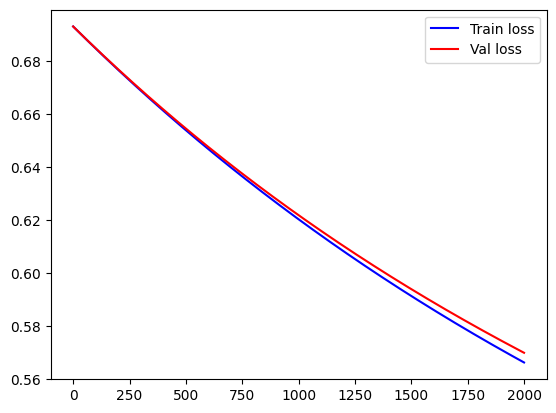

In [18]:
#train ovr model using ovr training sets
lr_model_left_of = lr_train_model(X_train_on_the_left_of, y_train_on_the_left_of)
display_results(lr_model_left_of)

#convert test sets to ovr format to match the predictions of the model
X_test_left_of, y_test_left_of = ovr_data(X_test, y_test, 2)
accuracy[2] = (get_accuracy(lr_model_left_of['weights'],X_test_left_of, y_test_left_of))

print("Accuracy on test set:", accuracy[2])

train acc :  0.8983050847457628
val acc   :  0.875
Weights :  [-0.21678735  0.11941494  0.07884084  0.02340006  0.00766516  0.24975661
  0.00483824]
Accuracy on test set: 0.8708333333333333


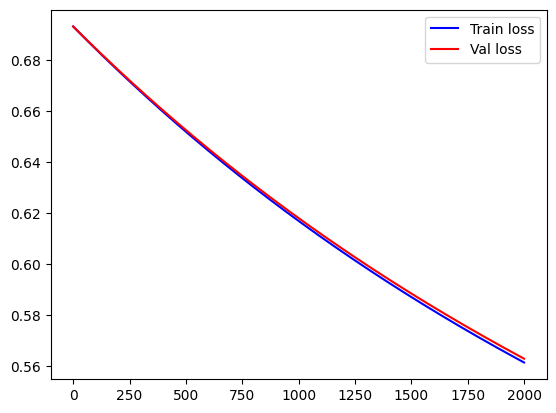

In [19]:
#train ovr model using ovr training sets
lr_model_right_of = lr_train_model(X_train_on_the_right_of, y_train_on_the_right_of)
display_results(lr_model_right_of)

#convert test sets to ovr format to match the predictions of the model
X_test_right_of, y_test_right_of = ovr_data(X_test, y_test, 3)
accuracy[3] = (get_accuracy(lr_model_right_of['weights'],X_test_right_of, y_test_right_of))

print("Accuracy on test set:", accuracy[3])

# QUESTION 4:  [10 marks]
## Compute the overall classification accuracy on the test set.

In [20]:
# Overall accuracy is the sum of the individual accuracy multiplied by the weighted average of these accuracies
#such that the weights are the proportion of samples in each class

overall_accuracy = np.zeros(4)

for i in range(4):
    overall_accuracy[i] = (accuracy[i]*(test_class_distribution[i]/len(y_test)))
  
print("Overall classification accuracy on test set:", overall_accuracy.sum())

Overall classification accuracy on test set: 0.8827777777777778


# Question 5 [10 marks]

## Define the 'recall' metric 
## Compute the recall score for each class separately and compare the scores to the accuracies of the individual OvR models
### NOTE: you may need to look up the definition of "recall", which function should be coded from scratch



Recall measures the proportion of positive instances that are correctly identified by the model, providing insights into the model's ability to capture positive instances, such that:

Recall = True Positives / (True Positives + False Negatives) 

A high recall indicates that the model is able to effectively capture the positive instances and minimize false negatives. However, a high recall may come at the expense of increasing false positives.

On the other hand, accuracy measures the proportion of all positive and negative instances that are correctly predicted by the model, such that:

Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)

In [33]:
def get_recall(W, X, y):
    
    """
    Computes the recall for a binary classification problem
    Args:
        W: A 1D array of the weights.
        X: A 2D array of the test data.
        y: A 1D array of the true labels.
    Returns:
        The recall score.
    """
        
    # Predict the labels using the predict_y_prob function
    Y_pred = (predict_y_prob(W, X) >= 0.5).astype(int)
    Y_pred = Y_pred.ravel()
    
    # Count the true positives (tp) and true positives + false negatives (tpfn)
    tp = 0
    tpfn = 0
    for i in range(len(Y_pred)):
        if Y_pred[i] == y[i]:  # true positive or true negative
            if Y_pred[i] == 1:  # true positive
                tp += 1
                tpfn += 1
        else:  # false positive or false negative
            if Y_pred[i] == 0:  # false negative
                tpfn += 1
    
    # Compute the recall as the ratio of true positives to true positives + false negatives
    return tp / tpfn

In [34]:
#above model

recall = get_recall(lr_model_above['weights'],X_test_above, y_test_above)

print("above_model:")
print("accuracy =",accuracy[0])
print("recall =",recall)
print("")


#under model

recall = get_recall(lr_model_under['weights'],X_test_under, y_test_under)

print("under_model:")
print("accuracy =",accuracy[1])
print("recall =",recall)
print("")


#left of model

recall = get_recall(lr_model_left_of['weights'],X_test_left_of, y_test_left_of)

print("left_of_model:")
print("accuracy =",accuracy[2])
print("recall =",recall)
print("")


#right of model

recall = get_recall(lr_model_right_of['weights'],X_test_right_of, y_test_right_of)

print("right_of_model:")
print("accuracy =",accuracy[3])
print("recall =",recall)


above_model:
accuracy = 0.9208333333333333
recall = 0.9074074074074074

under_model:
accuracy = 0.8666666666666667
recall = 0.75

left_of_model:
accuracy = 0.8875
recall = 0.9344262295081968

right_of_model:
accuracy = 0.8708333333333333
recall = 0.9473684210526315


The following observations can be made:

- above_model 

This model has a high accuracy and high recall score. The high accuracy and recall values suggest that your OVR model is performing well on the given dataset, and is able to make accurate predictions for both positive and negative cases.

- under_model

This model has relatively lower accuracy, indicating that the model misclassifies more samples overall. It also has a relatively lower recall score which indicates that the model misses more positive samples than the other models. This could be due to a high false negative rate or a low true positive rate. Overall, this suggests that the model may have difficulty distinguishing positive and negative samples, leading to lower performance in both accuracy and recall. 

- left_of_model and right_of_model 

These models have a good accuracy and a high recall score. This indicates that the models are performing relatively well in terms of overall accuracy, but it are still misclassifying some samples. The higher recall scores suggest that the models are better at identifying positive samples, but they may also be misclassifying some negative samples as positive.

In summary, the above_model and right_of_model have the highest accuracy and recall values, respectively, indicating that they are the most accurate and reliable models. The under_model has the lowest accuracy and recall values, indicating that it is the least accurate and reliable model. 

# Question 6 [15 marks]

## Define the confusion matrix
## Compute the confusion matrix and determine which class (or classes in case of a tie) is/are least confused with recalling "on the right of".
### NOTE: you may need to look up the definition of "confusion matrix", which function should be coded from scratch



A confusion matrix is a table that is used to evaluate the performance of a machine learning model in classification tasks. It is a matrix of the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model, such that:

- TP is the number of positive instances that were correctly classified by the model
- TN is the number of negative instances that were correctly classified by the model
- FP is the number of negative instances that were incorrectly classified as positive by the model
- FN is the number of positive instances that were incorrectly classified as negative by the model

The rows of the matrix correspond to the true labels, while the columns correspond to the predicted labels.

In [23]:
def predict_y_prob_ovr(W, num_classes, X_test):

    """
    Predicts the class labels of test data using multiple ovr models
    Args:
        W: A 2D array of the weights for each class.
        X_test: A 2D array of the test data.
        num_classes: The number of classes in the dataset.
    Returns:
        A 1D numpy array of predicted labels for the test samples.
    """
        
    # Get the number of test samples
    num_test = X_test.shape[0]
    
    # Add a column of ones as the bias term to the test data
    bias = np.ones([num_test,1], dtype=float)
    X_test = np.concatenate((bias,X_test),axis=1)
    
    # Create an array to hold the predicted labels for the test samples
    y_pred = np.zeros(num_test, dtype=int)
    
    # Loop over each test sample
    for i in range(num_test):
        
        # Initialize an array to hold the predicted probabilities for each class
        prob = np.zeros(num_classes)
        
        # Loop over each class and compute the predicted probability
        for j in range(num_classes):
            
            # Compute the dot product of the test sample and the weights for the current class
            z = np.dot(X_test[i], W[j])
            
            # Compute the predicted probability for the current class using the sigmoid function
            prob[j] = 1 / (1 + np.exp(-z))
            
        # Set the predicted label for the test sample to the class with the highest predicted probability
        y_pred[i] = np.argmax(prob)
    
    # Return the predicted labels for the test samples
    return y_pred



def confusion_matrix(y_true, y_pred, num_classes):
    
    """
    Computes the confusion matrix given the true and predicted labels.
    
    Args:
        y_true: A 1D array of true labels.
        y_pred: A 1D array of predicted labels.
        num_classes: The number of classes in the dataset.
    
    Returns:
        A 2D numpy array representing the confusion matrix.
    """
    
    # Initialize a 2D array of zeros for the confusion matrix
    cm = np.zeros((num_classes, num_classes), dtype=int)
    
    # Loop through all possible class label combinations
    for i in range(num_classes):
        for j in range(num_classes):
            # Compute the number of samples with true label i and predicted label j
            cm[i,j] = np.sum(np.logical_and(y_true == i, y_pred == j))
    
    # Return the confusion matrix
    return cm


In [24]:
W = [lr_model_above['weights'], lr_model_under['weights'], lr_model_left_of['weights'], lr_model_right_of['weights']]
y_pred = predict_y_prob_ovr(W, 4, X_test)

cm = confusion_matrix(y_test, y_pred, 4)
print(cm)

[[47  0  4  3]
 [ 1 50 10  7]
 [ 4  6 49  2]
 [ 3  2  1 51]]


The last row of the confusion matrix corresponds to "on the right of" (i.e class 3). The confusion matrix shows that when considering class 3 as the positive class, there are 3 false positives for class 0, 2 false positives for class 1 and 1 false positive for class 2. 

Therefore, class 2 which corresponds to "on the left of" is least confused with recalling class "on the right of" because it has the least number of misclassifications into class 3.